# Pendahuluan <a id='intro'></a>
**Studi Kasus: Faktor - faktor yang Mempengaruhi Harga Kendaraan**

Sebuah perusahaan bernama `Crankshaft List` ingin mengetahui faktor - faktor apa saja yang mempengaruhi harga kendaraan. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Kita perlu untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Tujuan Proyek:
1. Mengetahui faktor-faktor apa saja yang mempengaruhi harga penjualan dari pengolahan data yang ada dengan melakukan hipotesis -hipotesis.
2. Memberikan kesimpulan umum dari hasil analisa yang diujikan.
    

## Hipotesis
1. Apakah benar rata - rata harga mobil yang dijual di `Crankshaft List` berada di kisaran `harga USD 10000`?
2. Apakah benar rata - rata usia mobil yang dijual di `Crankshaft List` berada di kisaran `usia 5 tahun`?
3. Apakah benar rata-rata jarak tempuh mobil yang dijual `Crankshaft List` berkisar `150000 Miles`?
4. Apakah benar waktu tayang iklan rata-rata berada pada `30 hari` sampai mobil terjual?
5. Apakah benar korelasi antara harga `'price'` dengan usia `'usia'` memiliki korelasi negatif yang kuat?
6. Apakah benar mobil `sedan` dengan tipe transmisi `automatik` memiliki harga jual yang tinggi dibandingkan dengan tipe transmisi lain?
7. Apakah benar mobil `suv` dengan tipe transmisi `manual` memiliki harga jual yang tinggi dibandingkan dengan tipe transmisi lain?
8. Apakah benar mobil `sedan` dengan tipe warna `hitam` memiliki harga jual yang tinggi dibandingkan dengan warna lain?
9. Apakah benar mobil `suv` dengan tipe warna `orange` memiliki harga jual yang tinggi dibandingkan dengan warna lain?

# Konten <a id='back'></a>

* [1.Pendahuluan](#intro)
    * [1.1 Tujuan Proyek](#cont_1)
    * [1.2 Hipotesis](#cont_2)
* [2. Konten](#cont_3)
    * [2.1 Pra-pemrosesan](#cont_4)
      * [2.1.1 Memuat Data](#cont_5)
      * [2.1.2 Mengeksplorasi Data Awal](#cont_6)
      * [2.1.3 Kesimpulan dan Langkah-Langkah Selanjutnya](#cont_7)
    * [2.2 Mengatasi Nilai-Nilai yang Hilang (Jika Ada)](#cont_8)
      * [2.2.1 Mengatasi nilai hilang pada kolom `model_year`](#cont_9)
      * [2.2.2 Mengatasi nilai hilang pada kolom `cylinders`](#cont_10)
      * [2.2.3 Mengatasi nilai hilang pada kolom `odometer`](#cont_11)
      * [2.2.4 Mengatasi nilai hilang pada kolom `is_4wd`](#cont_12)
      * [2.2.5 Mengatasi nilai hilang pada kolom `paint_color`](#cont_13)
    * [2.3 Memperbaiki Tipe Data](#cont_14)
    * [2.4 Memperbaiki Kualitas Data](#cont_15)
      * [2.4.1 Membuat Kolom Tambahan dari Datetime](#cont_16) 
      * [2.4.2 Membuat Kolom Usia Mobil](#cont_17) 
      * [2.4.3 Membuat Kolom Rata-rata Jarak Tempuh Kendaraan per Tahun](#cont_18)
      * [2.4.4 Mengubah Kolom Condition Menjadi Ordinalitas](#cont_19)
    * [2.5 Memeriksa Data yang Sudah Bersih](#cont_20)
    * [2.6 Mempelajari Parameter Inti](#cont_21)
    * [2.7 Mempelajari dan Menangani Outlier](#cont_22)
    * [2.8 Mempelajari Parameter Inti Tanpa Outlier](#cont_23)
    * [2.9 Masa Berlaku Iklan](#cont_24)
      * [2.9.1 Menghitung Rata-Rata Waktu Tayang Iklan](#cont_25)
      * [2.9.2 Menghitung Waktu Tayang Iklan Tersingkat](#cont_26)
      * [2.9.3 Mencari Waktu Tayang Iklan Terlama](#cont_27)
    * [2.10 Harga Rata-Rata Setiap Jenis Kendaraan](#cont_28)
    * [2.11 Faktor Harga](#cont_29)
      * [2.11.1 Mobil Sedan](#cont_30)
      * [2.11.1 Mobil SUV](#cont_31)
    * [2.12 Kesimpulan umum](#cont_32)

## Pra-pemrosesan

Tahap awal adalah dengan memuat semua `library` terlebih dahulu, dimana library yang digunakan `pandas`untuk memproses data, `matplotlib` dan `seaborn` digunakan untuk membuat grafik dari data yang diolah, dan `numpy` untuk mengecek nilai kosong pada cell.

In [1]:
# Memuat semua library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Memuat Data

Selanjutnya kita muat data csv file, sesuai dengan dataset, yaitu `vehicle_us.csv`, dan kita berikan nama variable `df`

In [2]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

*Dataset* berisi kolom-kolom berikut: 

- `price` — harga sebuah mobil
- `model_year` — tahun model pembuatan mobil
- `model` — model mobil
- `condition` — kondisi mobil (baru, bekas dan lain-lain)
- `cylinders` — jumlah silinder mobil
- `fuel` — jenis bahan bakar mobil
- `odometer` — jarak tempuh mobil saat iklan ditayangkan  
- `transmission` — jenis transmisi mobil
- `paint_color` — warna mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

In [3]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Dari informasi data di atas, maka data frame terdiri dari 13 kolom dan 51525 baris. Dimana, data terdiri dari beberapa type `float64`, `int64`, dan `object`

In [4]:
# menampilkan sampel data dari paling atas
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
18395,5995,2007.0,toyota rav4,good,4.0,gas,150678.0,automatic,SUV,brown,1.0,2018-12-01,85
19395,14800,2014.0,chevrolet silverado 1500,excellent,6.0,gas,NaN,automatic,truck,silver,NaN,2018-06-07,57
9985,4995,2010.0,subaru impreza,good,4.0,gas,124545.0,manual,sedan,NaN,1.0,2018-05-16,37
42142,2495,2000.0,subaru forester,good,4.0,gas,125468.0,automatic,wagon,silver,1.0,2018-07-22,19
28090,25975,2016.0,ford f-150,like new,8.0,gas,32146.0,automatic,pickup,grey,1.0,2018-07-17,50


In [5]:
# menampilkan sampel data dari paling bawah
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [6]:
# menampilkan tipe dari data set
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Dari tipe dataset maka kita perlu melakukan perubahan tipe data untuk `model_year`, `cylinder` , dan `date_posted`

In [7]:
# menampilkan informasi statistik dari data set
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Dari data informasi statistik, terlihat bahwa std deviasi pada kolom `price` dan kolom `odometer` menunjukkan std deviasi yang sangat tinggi bila dibandingkan denghan kolom lainnya, dan ini menunjukkan distribusi data yang kurang baik. Perlu dianalisa lebih lanjut, untuk kemudian diperbaiki datanya.

In [8]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
report = df.isna().sum().to_frame()
report = report.rename(columns={0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


Dari pengecekan data yang hilang, terlihat bahwa data yang hilang ada pada kolom `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`. Dan akan kita coba kita perbaiki dari data yang kita miliki.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Dataset sudah dapat ditampilkan dan dapat diambil beberapa informasi yang `normal` dan beberapa informasi yang `tidak normal`, sehingga diperlukan analisa lanjutan.

Beberapa informasi yang normal di antaranya:
- dataset `model` sudah memiliki informasi yang cukup jelas terkait model mobil
- dataset `fuel` sudah memiliki informasi yang cukup jelas terkait jenis bahan bakar mobil
- dataset `type` sudah memiliki informasi yang cukup jelas terkait tipe mobil
- dataset `transmission` sudah memiliki informasi yang cukup jelas terkait jenis transmisi mobil
- dataset `days_listed` sudah memiliki informasi yang cukup jelas terkait lama waktu iklan diposting

Beberapa informasi yang tidak normal di antaranya:
- dataset `price` dan `odometer` memiliki standar deviasi yang tinggi yang akan berpengaruh terhadap faktor harga mobil
- dataset `model_year`, `cylinders`, `date_posted` menggunakan tipe data yang salah
- dataset `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd` memiliki nilai yang hilang
- dataset `condition` masih menggunakan kategori, ini akan menyulitkan kita saat menganalisis pengaruhnya terhadap `price`.

Langkah-langkah untuk memperbaiki informasi yang tidak normal di antaranya:
- Mengecek apakah terdapat outliers pada dataset `price` dan `odometer`, jika terdapat banyak outliers maka diperlukan eliminasi outliers tersebut
- mengubah tipe data `model_year`, `cylinders` menjadi tipe data `integer`
- mengubah tipe data `date_posted` menjadi tipe data `datetime`
- membuat ordinalitas pada dataset `condition` dengan mengubahnya kebentuk numerik
- memperbaiki nilai yang hilang pada dataset `model_year`, `cylinders`, `odometer`, `is_4wd`, `paint_color`  


## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Selanjutnya, kita akan mengatasi nilai yang hilang, dan menentukan metode yang akan digunakan mengisi nilai yang hilang tersebut.

In [9]:
# memperbaiki data set 'model_year' yang hilang
# menampilkan sampel data set 'model_year' yang hilang
df[df['model_year'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


Dari pengecekan sampel data `model_year` yang hilang, terlihat bahwa tahun mobil, berkorelasi dengan `model` dan juga `condition`, maka kita akan menggunakan kolom `model` dan `condition` untuk mengisi nilai yang hilang pada `model year`

### Mengatasi nilai hilang pada kolom `model_year`

In [10]:
# memperbaiki kolom 'model_year' oleh kolom 'model' dan kolom 'condition'

# membuat dictionary 'model_year' yang memiliki nilai berdasarkan 'model' dan 'condition'
dict_model_condition_year = df.groupby(['model','condition'])['model_year'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_condition_year.get((data['model'],data['condition']))
    return data['model_year']

# menerapkan fungsi kedalam dataframe
df['model_year'] = df.apply(repair_model_year,axis=1)

#pengecekan data yang hilang
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,NaN,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,NaN,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


Masih ditemukan nilai yang hilang pada kolom `model_year`, sehingga kita dapat mencoba menggunakan kolom lain pada kolom `model_year`. Mari, kita gunakan kolom `model` dan `type`.

In [11]:
# memperbaiki kolom 'model_year' oleh kolom 'model' dan kolom 'type'
# membuat dictionary 'model_year' yang memiliki nilai berdasarkan 'model' dan 'type'
dict_model_type_year = df.groupby(['model','type'])['model_year'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_type_year.get((data['model'],data['type']))
    return data['model_year']

# menerapkan fungsi kedalam dataframe
df['model_year'] = df.apply(repair_model_year,axis=1)

# pengecekan nilai yang hilang 
df['model_year'].isna().sum()

0

Terlihat setelah menggunakan kolom `model` dan `type` untuk mengisi kolom `model_year`, sudah tidak ditemukan lagi data yang hilang pada kolom `model_year`. Mari, kita lanjutkan ke kolom yang lain.

### Mengatasi nilai hilang pada kolom `cylinders`

In [12]:
# menampilkan sampel data dari kolom 'cylinders'
df[df['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


Dari sampel data, kita dapat mencoba menggunakan kolom `model` untuk mengisi nilai yang hilang pada kolom `cylinders`, dikarenakan pada umumnya jumlah silinder mobil juga tergantung pada tipe mobilnya.

In [13]:
# memperbaiki kolom 'cylinders' oleh 'model'

# membuat dictionary 'cylinders' yang memiliki nilai berdasarkan 'model'
dict_model_cyl = df.groupby('model')['cylinders'].mean().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_cylinders(data):
    if np.isnan(data['cylinders']):
        return dict_model_cyl.get(data['model'])
    return data['cylinders']

# menerapkan fungsi kedalam dataframe
df['cylinders'] = df.apply(repair_cylinders,axis=1)

# pengecekan nilai yang hilang 
df['cylinders'].isna().sum()

0

Sekarang, kolom `cylinders` sudah tidak mempunyai data yang hilang, mari kita lanjutkan data berikutnya.

### Mengatasi nilai hilang pada kolom `odometer`

In [14]:
# Tampilkan sampel data yang hilang dari kolom 'odometer'
df[df['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


Dari data sampel, kita dapat melihat bahwa kolom `odometer` terkait dengan kolom `model` dan `type`. Mari kita gunakan kolom `model` dan `type` untuk mengisi nilai yang hilang pada kolom `odometer`. Mari, kita lanjutkan mengatasi data yang hilang selanjutnya.

In [15]:
# memperbaiki kolom 'odometer' oleh 'model' dan type

# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model' dan 'type'
dict_model_odo = df.groupby(['model', 'type'])['odometer'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_odometer(data):
    if np.isnan(data['odometer']):
        return dict_model_odo.get((data['model'], data['type']))
    return data['odometer']

# menerapkan fungsi kedalam dataframe
df['odometer'] = df.apply(repair_odometer, axis=1)

# pengecekan nilai yang hilang 
df['odometer'].isna().sum()

56

Dari penggunaan kolom `model` dan `type` untuk mengisi kolom `odometer`, ternyata masih ditemukan 56 data yang hilang pada kolom `odometer`. Mari kita gunakan kolom lain untuk mengisi kolom `odometer`, mari kita gunakan kolom `model_year`

In [16]:
# memperbaiki kolom 'odometer' oleh 'model_year'

# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'model_year'
dict_model_odo = df.groupby('model_year')['odometer'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_odometer(data):
    if np.isnan(data['odometer']):
        return dict_model_odo.get(data['model_year'])
    return data['odometer']

# menerapkan fungsi kedalam dataframe
df['odometer'] = df.apply(repair_odometer, axis=1)

# pengecekan nilai yang hilang 
df['odometer'].isna().sum()

1

Dari penggunaan kolom `model_year` untuk mengisi kolom `odometer`, ternyata masih ditemukan 1 data yang hilang pada kolom `odometer`. Mari kita gunakan kolom lain untuk mengisi kolom `odometer`, mari kita gunakan kolom `condition`

In [17]:
# memperbaiki kolom 'odometer' oleh 'condition'

# membuat dictionary 'odometer' yang memiliki nilai berdasarkan 'condition'
dict_model_odo = df.groupby('condition')['odometer'].median().to_dict()

# membuat fungsi untuk mengisi nilai yang hilang menggunakan dictionary yang sudah dibuat
def repair_odometer(data):
    if np.isnan(data['odometer']):
        return dict_model_odo.get(data['condition'])
    return data['odometer']

# menerapkan fungsi kedalam dataframe
df['odometer'] = df.apply(repair_odometer, axis=1)

# pengecekan nilai yang hilang 
df['odometer'].isna().sum()

0

Akhirnya, setelah kita menggunakan kolom `condition` untuk mengisi nilai yang hilang pada kolom `odometer`, sudah tidak ada nilai yang hilang pada kolom `odometer`. Mari kita lanjutkan mengatasai data yang hilang selanjutnya.

### Mengatasi nilai hilang pada kolom `is_4wd`

In [18]:
# Tampilkan sampel data yang hilang dari kolom 'is_4wd'
df['is_4wd'].head()

0    1.0
1    1.0
2    NaN
3    NaN
4    NaN
Name: is_4wd, dtype: float64

Jika melihat data dari kolom `is_4wd`, nilai terdiri dari `1` dan `Nan`, jadi bisa kita simpulkan kita dapat ganti nilai `NaN` menjadi `0`, untuk menunjukkan bahawa `0`, bukanlah `4wd`

In [19]:
# Mengecek jumlah data yang hilang dan terisi
df['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [20]:
# Kita ganti nilai NaN dengan Nilai 0
df['is_4wd'].fillna(0,inplace=True)
df['is_4wd'].value_counts(dropna=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Sekarang, di kolom `is_4wd` sudah tidak terdapat lagi yang hilang. Mari kita lanjutkan mengatasi data yang hilang selanjutnya.

### Mengatasi nilai hilang pada kolom `paint_color`

In [21]:
# menampilkan sampel data set 'paint_color' yang hilang
df[df['paint_color'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,124476.5,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8


In [22]:
# mari kita cek jumlah data yang hilang pada kolom 'paint_color'
df['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Terlihat bahwa kolom `paint_color` mempunya 9267 nilai yang hilang, maka kita akan isi nilai yang hilang tersebut dengan `'unknown'`.

In [23]:
# Mengganti nilai yang hilang dengan 'unknown'
df['paint_color'].fillna('unknown', inplace=True)

# Menampilkan hasil setelah pengisian nilai yang hilang
df['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

Sekarang kita sudah berhasil mengubah nilai yang hilang menjadi `'unknown'`.

In [24]:
# Mengecek kembali nilai yang hilang pada semua kolom
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Dari data di atas, terlihat untuk semua kolom sudah tidak mempunyai nilai yang hilang lagi.

In [25]:
# Mengecek kembali apakah masih ada data duplikat
df.duplicated().sum()

0

Sudah tidak ditemukan kembali data duplikat. Selanjutnya, kita perbaiki tipe data.

## Memperbaiki Tipe Data

Selanjutnya, kita perbaiki tipe data, sesuai dengan analisa kita sebelumnya.

In [26]:
# Mengubah tipe data kolom days_listed, id, model_year, dan cylinders menjadi int
df['days_listed'] = df['days_listed'].astype(int)
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)

# Mengubah tipe data kolom is_4wd menjadi boolean
df['is_4wd'] = df['is_4wd'].astype(bool)

# Mengubah tipe data kolom price dan odometer menjadi float
df['price'] = df['price'].astype(float)
df['odometer'] = df['odometer'].astype(float)

# Mengubah tipe data kolom date_posted menjadi datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])


df.dtypes

price                  float64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Sekarang tipe data sudah kita perbaiki sebagaimana yang kita harapkan, selanjutnya kita perbaiki kualitas datanya.

## Memperbaiki Kualitas Data

Selanjutnya kita akan memperbaiki kualitas data untuk memudahkan kita dalam melakukan analisis. Adapun kita akan memperbaiki kualitas data tersebut seperti menambahkan kolom untuk memisahkan `hari ke-, bulan, tahun, tanggal`. Selain itu kita akan menambahkan `kolom usia mobil`, `rata-rata jarak tempuh per tahun` dan `membuat ordinalitas pada kolom condition`. Mari kita buat kolom untuk memisahkan datetime.

### Membuat Kolom Tambahan dari Datetime

In [27]:
# menambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 

# menambahkan kolom 'day'
df['day'] = df['date_posted'].dt.dayofweek

# menambahkan kolom 'tahun'
df['year'] = df['date_posted'].dt.year

# menambahkan kolom 'bulan'
df['month'] = df['date_posted'].dt.month

# menambahkan kolom 'tanggal'
df['date'] = df['date_posted'].dt.day

# menampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year,month,date
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,23
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,19
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,7
3,1500.0,2003,ford f-150,fair,8,gas,124476.5,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,22
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2


Saat ini kita sudah berhasil menambahkan kolom `day`, `year`, `month`, dan `date` dimana kolom tersebut adalah pecahan dari kolom `date_posted`. Sekarang kita lanjutkan untuk membuat kolom `lifetime` mobil.

### Membuat Kolom Usia

In [28]:
# Tambahkan usia ke# menambahkan usia kendaraan saat iklan ditayangkan
df['lifetime'] = (df['year'] - df['model_year']).astype(int) + 1
# menampilkan sampel data
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year,month,date,lifetime
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,23,8
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,19,11
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,7,7
3,1500.0,2003,ford f-150,fair,8,gas,124476.5,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,22,17
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2,3


Kita berhasil menambahkan kolom `lifetime`, sekarang kita akan menambahkan kolom `avg_mileage`, yang mana merupakan `rata-rata jarak tempuh kendaraan per tahun`.

### Membuat Kolom Rata-rata Jarak Tempuh Kendaraan per Tahun

In [29]:
# menambahkan jarak tempuh rata-rata kendaraan per tahun

# menghitung jarak rata-rata kendaraan
df['avg_mileage'] = df['odometer']/df['lifetime']

# menampilkan sampel data
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year,month,date,lifetime,avg_mileage
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,23,8,18125.000000
1,25500.0,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,19,11,8064.090909
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,7,7,15714.285714
3,1500.0,2003,ford f-150,fair,8,gas,124476.5,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,22,17,7322.147059
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2,3,26967.666667


### Mengubah Kolom Condition menjadi Ordinalitas

In [30]:
# mengganti kategorik menjadi nilai rating untuk memudahkan analisis

def get_condition(cell):
    if cell == 'salvage':
        return 0
    elif cell == 'fair':
        return 1
    elif cell == 'good':
        return 2
    elif cell == 'excellent':
        return 3
    elif cell == 'like new':
        return 4
    elif cell == 'new':
        return 5
    else:
        return cell 
    
df['condition'] = df['condition'].apply(get_condition).astype(int)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year,month,date,lifetime,avg_mileage
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,23,8,18125.000000
1,25500.0,2008,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,19,11,8064.090909
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,7,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,124476.5,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,22,17,7322.147059
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2,3,26967.666667


## Memeriksa Data yang Sudah Bersih

Setelah kita berhasil memodifikasi data, maka kita lanjutkan untuk mengecek rangkuman dari dataframe kita.

In [31]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day           51525 non-null  int64         
 14  year          51525 non-null  int64         
 15  month         51525 non-null  int64 

Saat ini kita mempunyai data dengan detail 51252 baris dan 19 kolom.

In [32]:
# tampilkan sampel data 
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,year,month,date,lifetime,avg_mileage
49109,4500.0,2001,ram 1500,2,8,gas,165000.0,automatic,truck,white,True,2018-07-25,32,2,2018,7,25,18,9166.666667
1234,14990.0,2010,ford econoline,2,8,gas,53366.0,automatic,truck,white,False,2018-05-25,14,4,2018,5,25,9,5929.555556
44934,5000.0,2006,chevrolet colorado,2,5,gas,231580.0,automatic,truck,silver,True,2018-12-16,31,6,2018,12,16,13,17813.846154
21024,13595.0,2017,volkswagen jetta,3,4,gas,33775.0,automatic,sedan,red,False,2018-11-15,28,3,2018,11,15,2,16887.500000
45485,4995.0,2000,chevrolet silverado 1500,2,8,gas,190000.0,automatic,pickup,green,True,2018-12-29,64,5,2018,12,29,19,10000.000000
17870,9200.0,2007,ford mustang,4,8,gas,130000.0,manual,coupe,blue,False,2019-03-04,22,0,2019,3,4,13,10000.000000
1718,7500.0,2005,toyota 4runner,1,8,gas,223180.0,automatic,SUV,unknown,True,2019-04-07,40,6,2019,4,7,15,14878.666667
50692,6450.0,2010,toyota prius,3,4,gas,134375.0,automatic,hatchback,blue,False,2018-06-13,30,2,2018,6,13,9,14930.555556
1393,3000.0,2008,dodge grand caravan,2,6,gas,181425.0,automatic,mini-van,blue,False,2019-01-23,17,2,2019,1,23,12,15118.750000
19750,3800.0,2007,bmw x5,3,6,gas,195382.0,automatic,SUV,silver,True,2019-01-23,20,2,2019,1,23,13,15029.384615


Sampel data juga menunujukkan bahwa data kolom dan baris sudah sesuai dengan yang kita harapkan.

## Mempelajari Parameter Inti 
Selanjutnya kita akan mempelajari parameter inti, dimanan kita akan mengecek beberapa outlier yang mempengaruhi data.

Dan beberapa parameter tersebut adalah:
* price
* cylinders
* avg_mileage
* lifetime
* condition


Mari kita lakukan dengan beberapa tahap di bawah ini:

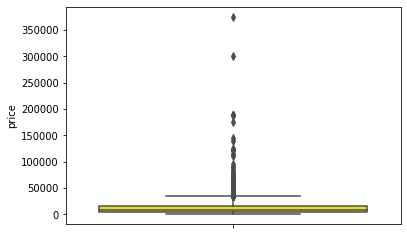

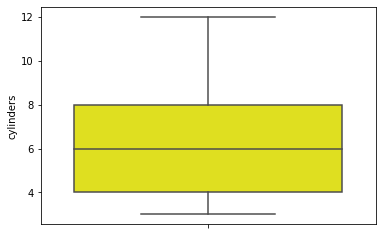

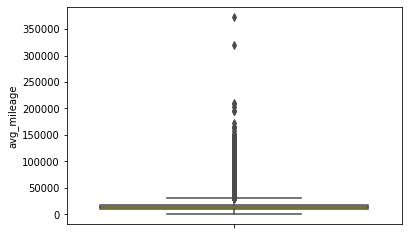

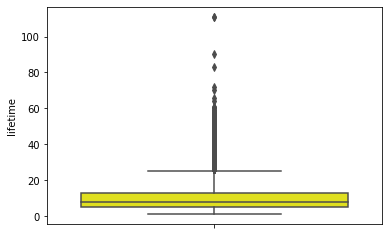

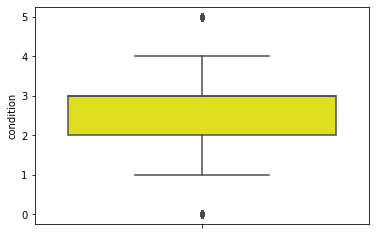

In [33]:
# Melakukan pengecekan paramater inti dengan boxplot

numeric_columns = ['price','cylinders','avg_mileage','lifetime','condition']
for column in numeric_columns:
    sns.boxplot(data=df,y=column,color='yellow')
    plt.show()

Dari boxplot di atas, terlihat bahwa kolom `price`, `avg_mileage`, `lifetime`, dan `condition`, memiliki outlier, namun untuk `condition` outliernya tidak sebanyak kolom `price`, `avg_mileage`, `lifetime`.  Kita akan lanjutkan pengecekan dengan histogram dengan menggunakan parameter yang sama. Dan untuk kolom `cylinders` tidak nampak adanya outlier. 

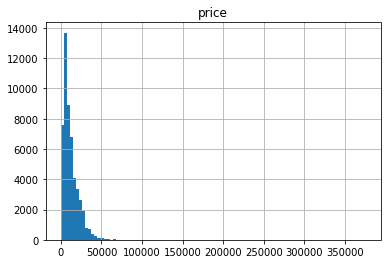

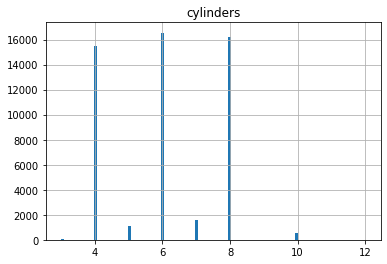

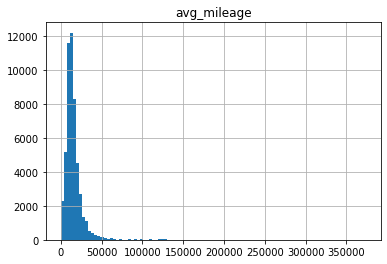

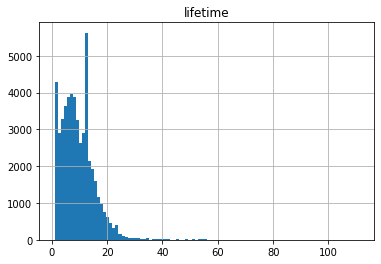

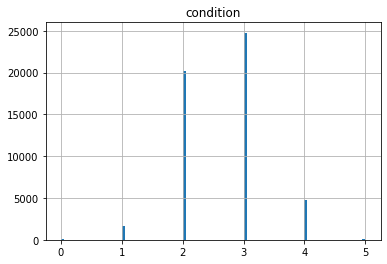

In [34]:
# distribusi dataframe menggunakan histogram
for column in numeric_columns:
    df[[column]].hist(bins=100)
    plt.show()



Dari histogram di atas, kita masih kesulitan untuk membaca distribusi nilainya, maka kita lakukan modifikasi, agar grafiknya dapat mudah dibaca.

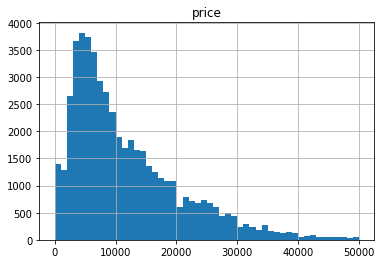

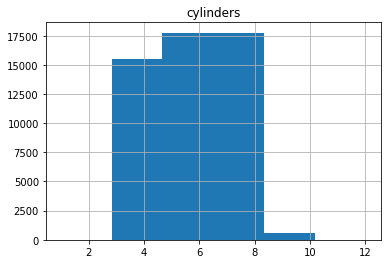

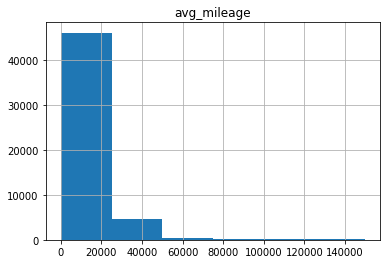

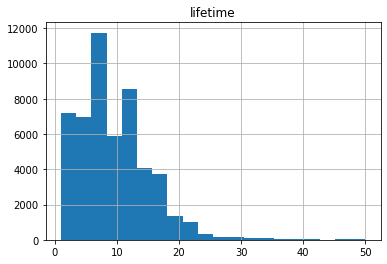

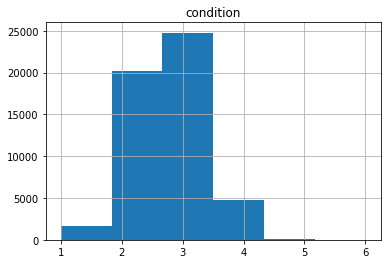

In [35]:
# memperbaiki skala histogram untuk mempermudah pembacaan diagram
df[['price']].hist(bins=50,range=(0,50000))
df[['cylinders']].hist(bins=6,range=(1,12))
df[['avg_mileage']].hist(bins=6,range=(0,150000))
df[['lifetime']].hist(bins=20,range=(1,50))
df[['condition']].hist(bins=6,range=(1,6))

# menampilkan chart
plt.show()


Dari histogram di atas terlihat bahwa distribusi nilai kolom `price`berada di range USD 4000 - USD 5000. Kemudian, kolom `cylinders` berada di range 6 hingga 8. Dan untuk kolom `avg_mileage`distribusinya berada pada range 0 - 25000 Miles. Dan untuk kolom `lifetime` berada pada range 5 - 7 tahun. Untuk kolom `condition` kelompok nilai 3 - excellent menjadi distribusi terbanyak.

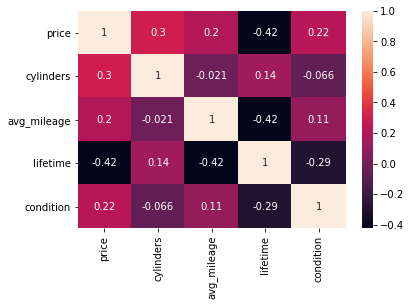

In [36]:
# Menampilkan korelasi
corr = df[numeric_columns].corr()
sns.heatmap(corr,annot=True)

# menampilkan chart
plt.show()


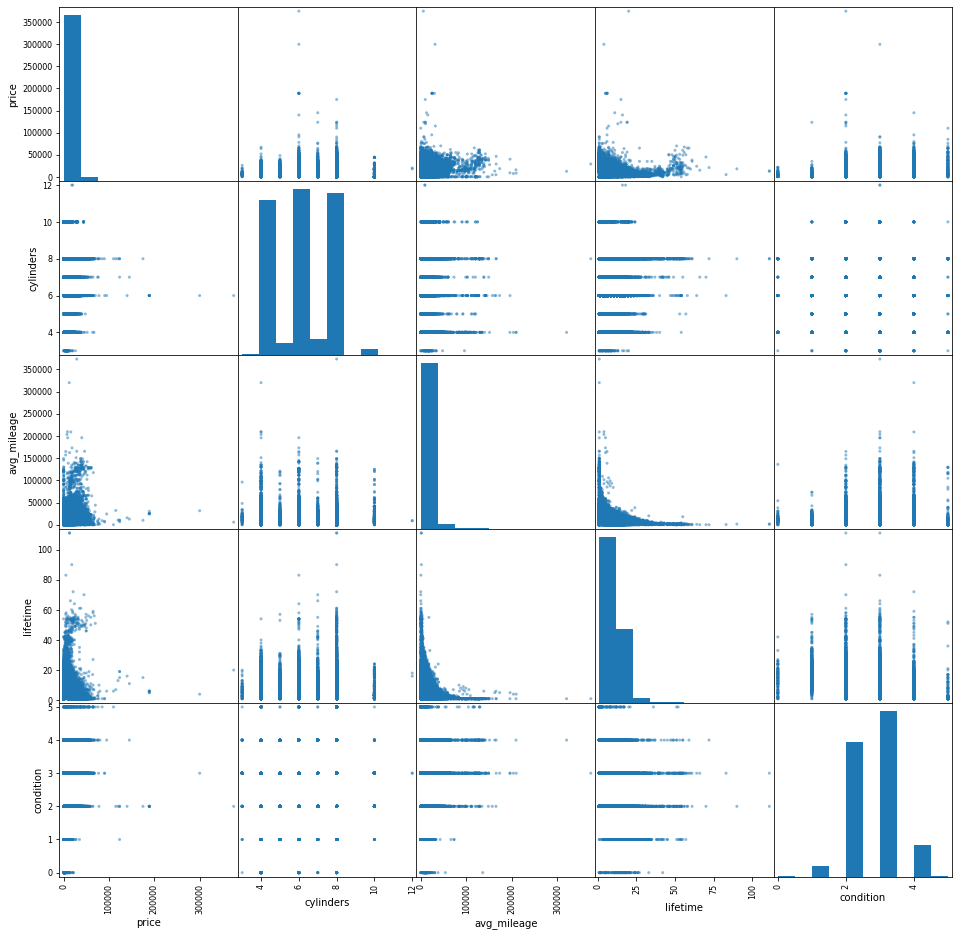

In [37]:
## pengecekan korelasi antar dataset secara grafik
pd.plotting.scatter_matrix(df[numeric_columns],figsize=(16,16))
plt.show()



Dari grafik korelasi plot scatter diatas, terlihat bahwa kolom `price` mempunyai korelasi negatif dengan kolom `lifetime` dan `avg_mileage`sehingga dapat disimpulkan, semakin rendah `lifetime` mobil, maka harganya akan mahal, semakin rendah `avg_mileage` harga akan makin mahal. Sedangkan untuk kolom `cylinders`, `avg_mileage`, `condition` memiliki korelasi positif, yang artinya semakin banyak jumlah cylinder harga akan makin mahal, semakin bagus kondisi mobilnya harga semakin mahal.

## Mempelajari dan Menangani Outlier

Karena masih adanya data outlier, maka kita perlu menangani data outlier tersebut untuk membantu kemudahan analisa. Dan kita akan fokus pada kolom `price`, `cylinders`, `avg_mileage`, `lifetime`, `condition`.

In [38]:
#membuat fungsi batas atas dan batas bawah

def upper_lower_whisker(series):
    Q1  = series.quantile(0.25)
    Q3  = series.quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker


In [39]:
def outlier_cleansing(dataframe, column):
    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if (lower == lower_check) and (upper == upper_check):
        print(f'\n====== [FINISHED] outlier in [{column}] column has been cleared! ====== \n')
        return dataframe
    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe


====== [START] cleaning outlier in condition column ====== 

lower values : 0.5
upper values : 4.5


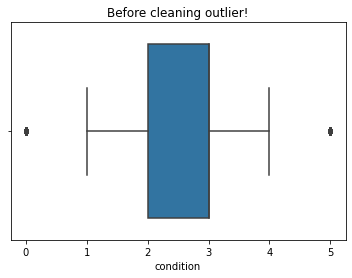

lower_check values : 0.5
upper_check values : 4.5


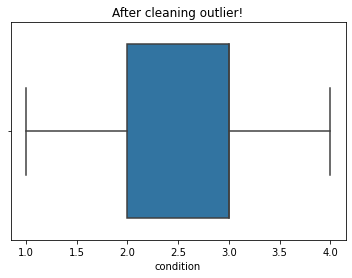


====== [FINISHED] outlier in [condition] column has been cleared! ====== 


====== [START] cleaning outlier in price column ====== 

lower values : -12700.0
upper values : 34500.0


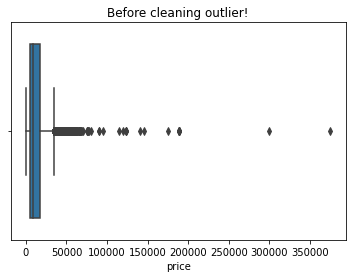

lower_check values : -11362.5
upper_check values : 32257.5


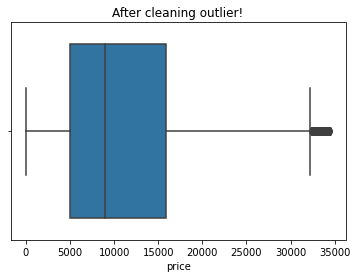


------ [RE-START] cleaning outlier in price column ------ 

lower values : -11362.5
upper values : 32257.5


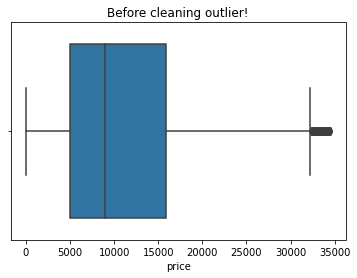

lower_check values : -10762.5
upper_check values : 31257.5


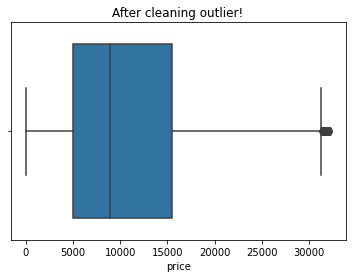


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10762.5
upper values : 31257.5


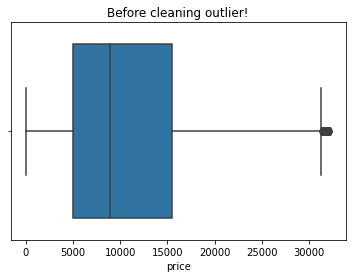

lower_check values : -10012.5
upper_check values : 30007.5


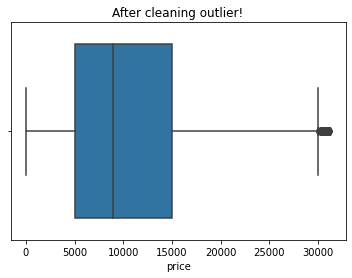


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10012.5
upper values : 30007.5


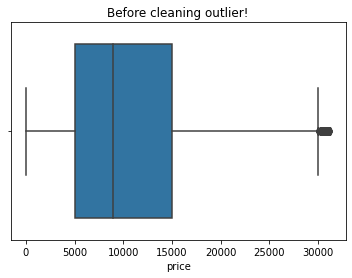

lower_check values : -10011.0
upper_check values : 30005.0


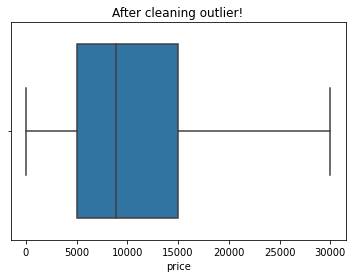


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10011.0
upper values : 30005.0


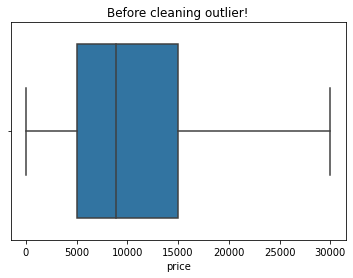

lower_check values : -10011.0
upper_check values : 30005.0


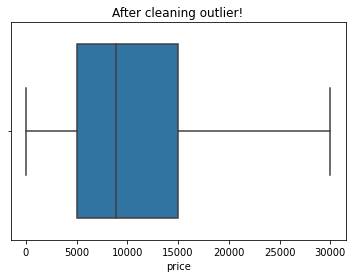


====== [FINISHED] outlier in [price] column has been cleared! ====== 


====== [START] cleaning outlier in avg_mileage column ====== 

lower values : -3347.106398809523
upper values : 30613.113839285714


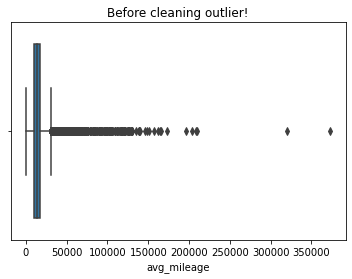

lower_check values : -2303.462499999998
upper_check values : 28372.437499999996


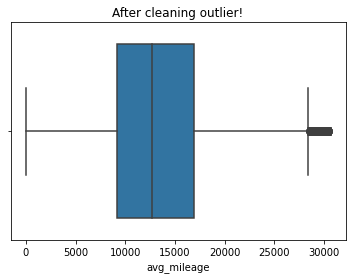


------ [RE-START] cleaning outlier in avg_mileage column ------ 

lower values : -2303.462499999998
upper values : 28372.437499999996


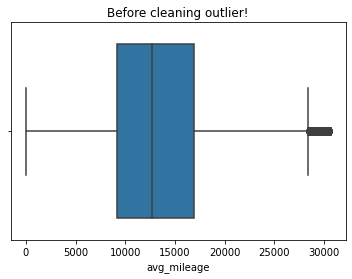

lower_check values : -2092.8571428571395
upper_check values : 27869.047619047615


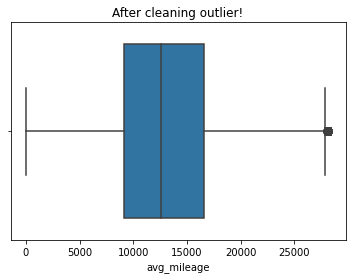


------ [RE-START] cleaning outlier in avg_mileage column ------ 

lower values : -2092.8571428571395
upper values : 27869.047619047615


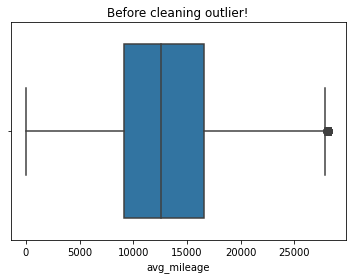

lower_check values : -2044.4999999999982
upper_check values : 27752.699999999997


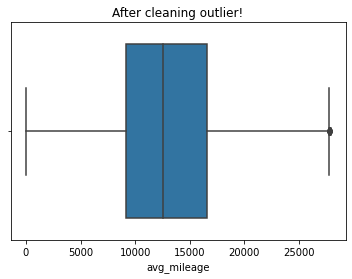


------ [RE-START] cleaning outlier in avg_mileage column ------ 

lower values : -2044.4999999999982
upper values : 27752.699999999997


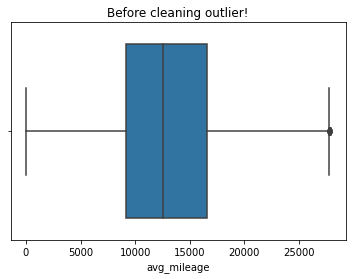

lower_check values : -2041.0
upper_check values : 27735.0


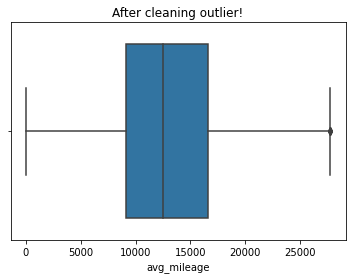


------ [RE-START] cleaning outlier in avg_mileage column ------ 

lower values : -2041.0
upper values : 27735.0


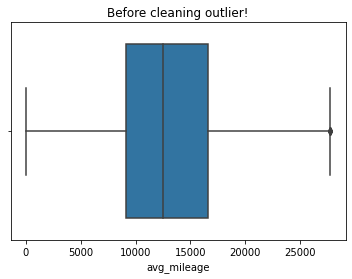

lower_check values : -2037.5000000000018
upper_check values : 27729.16666666667


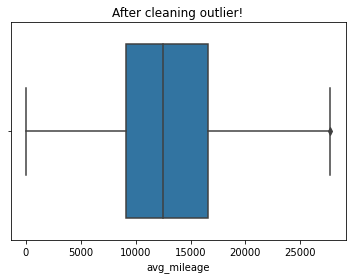


------ [RE-START] cleaning outlier in avg_mileage column ------ 

lower values : -2037.5000000000018
upper values : 27729.16666666667


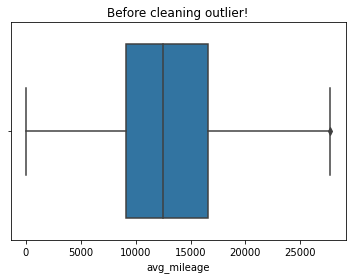

lower_check values : -2037.25
upper_check values : 27728.75


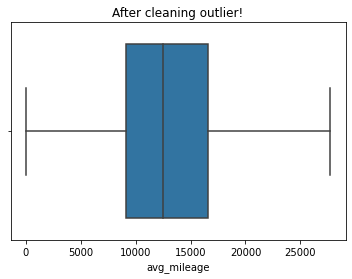


------ [RE-START] cleaning outlier in avg_mileage column ------ 

lower values : -2037.25
upper values : 27728.75


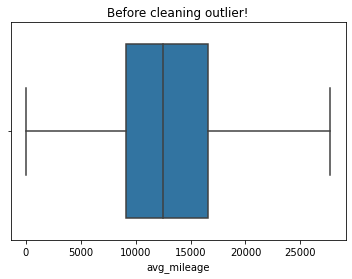

lower_check values : -2037.25
upper_check values : 27728.75


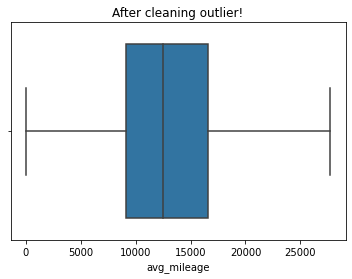


====== [FINISHED] outlier in [avg_mileage] column has been cleared! ====== 


====== [START] cleaning outlier in lifetime column ====== 

lower values : -4.5
upper values : 23.5


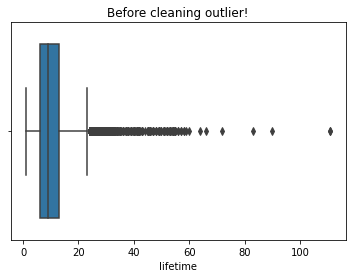

lower_check values : -4.5
upper_check values : 23.5


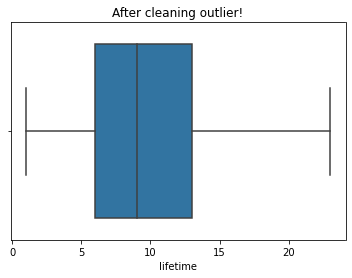


====== [FINISHED] outlier in [lifetime] column has been cleared! ====== 


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 14.0


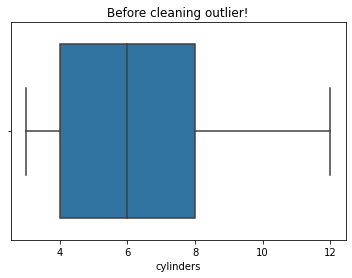

lower_check values : -2.0
upper_check values : 14.0


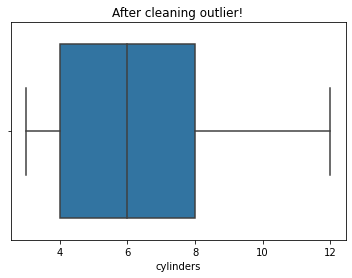


====== [FINISHED] outlier in [cylinders] column has been cleared! ====== 



In [40]:
df_final = df.copy()
list_of_selected_column = ['condition', 'price', 'avg_mileage', 'lifetime', 'cylinders']

for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    df_final = outlier_cleansing(dataframe=df_final, column=column)

## Mempelajari Parameter Inti Tanpa Outlier

Selanjutnya mari kita lakukan komparasi data `dengan outlier` dan `tanpa outlier`

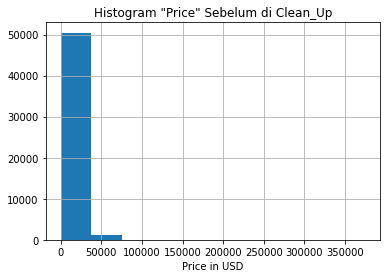

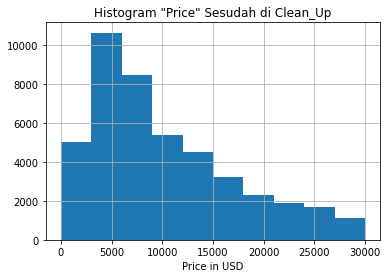

In [41]:
# komparasi kolom 'price' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
df[['price']].hist()
plt.title('Histogram "Price" Sebelum di Clean_Up')
plt.xlabel('Price in USD')

# sesudah di cleanup
df_final[['price']].hist()
plt.title('Histogram "Price" Sesudah di Clean_Up')
plt.xlabel('Price in USD')
plt.show() 

Dari grafik perbandingan di atas, terlihat bahwa data yang masih memiliki `outlier` memiliki range hingga `USD 350000`, dan data terfokus pada nilai `USD 25000`. Sedangkan data `tanpa outlier` melikiki range hingga `USD 30000`, dan harga mobil penyebaran merata, dengan range raga terkonsentrasi lebih banyak pada `USD 5000`. Perbedaannya terlihat signifikan.

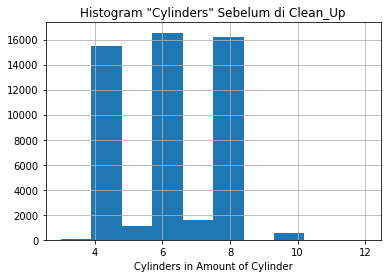

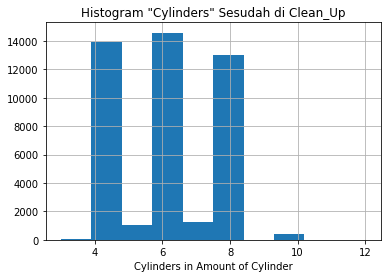

In [42]:
# komparasi kolom 'cylinders' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
df[['cylinders']].hist()
plt.title('Histogram "Cylinders" Sebelum di Clean_Up')
plt.xlabel('Cylinders in Amount of Cylinder')

# sesudah di cleanup
df_final[['cylinders']].hist()
plt.title('Histogram "Cylinders" Sesudah di Clean_Up')
plt.xlabel('Cylinders in Amount of Cylinder')
plt.show() 

Tidak ada perbedaan pada kolom `cylinders` sebelum di clean up dan setelah clean up.

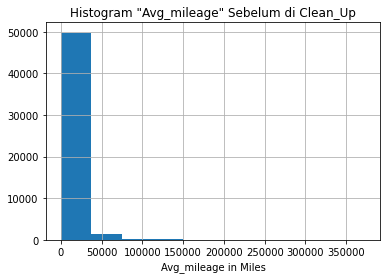

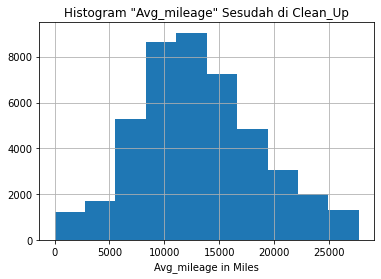

In [43]:
# komparasi kolom 'avg_mileage' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
df[['avg_mileage']].hist()
plt.title('Histogram "Avg_mileage" Sebelum di Clean_Up')
plt.xlabel('Avg_mileage in Miles')

# sesudah di cleanup
df_final[['avg_mileage']].hist()
plt.title('Histogram "Avg_mileage" Sesudah di Clean_Up')
plt.xlabel('Avg_mileage in Miles')
plt.show() 

Dari grafik di atas terlihat bahwa data `dengan outlier`, rrange `avg_mileage` dari 0 hingga 350000 Miles. Untuk data `tanpa outlier` memiliki range 0 hingga 28000 Miles, dengan persebaran terbanyak pada 12000 - 13000 Miles. Perbedaannya sangat signifikan.

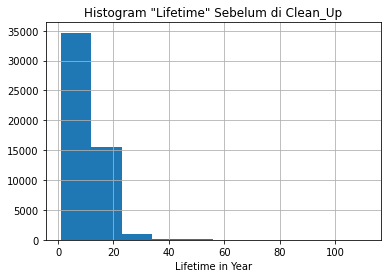

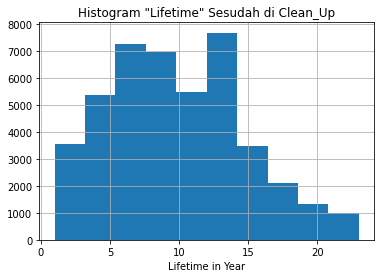

In [44]:
# komparasi kolom 'lifetime' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
df[['lifetime']].hist()
plt.title('Histogram "Lifetime" Sebelum di Clean_Up')
plt.xlabel('Lifetime in Year')

# sesudah di cleanup
df_final[['lifetime']].hist()
plt.title('Histogram "Lifetime" Sesudah di Clean_Up')
plt.xlabel('Lifetime in Year')
plt.show() 

Dari grafik di atas terlihat bahwa data `dengan outlier` untuk kolom `lifetime` mempunyai range nilai dari 1 - 100 Tahun, dengan persebaran diantara 5 - 10 Tahun. Dan pada data `tanpa outlier` mempunyai range nilai dari 1 - 24 Tahun, dengan persebaran terbanyak di 13 - 14 Tahun. Perbedaannya sangat signifikan.

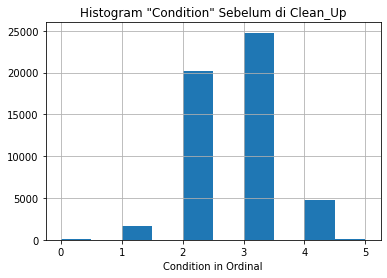

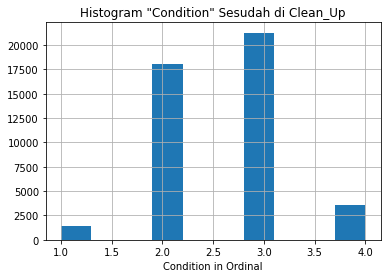

In [45]:
# komparasi kolom 'condition' sebelum dan sesudah di filter dari outliers
# sebelum di cleanup
df[['condition']].hist()
plt.title('Histogram "Condition" Sebelum di Clean_Up')
plt.xlabel('Condition in Ordinal')

# sesudah di cleanup
df_final[['condition']].hist()
plt.title('Histogram "Condition" Sesudah di Clean_Up')
plt.xlabel('Condition in Ordinal')
plt.show() 

Dari grafik di atas terlihat bahwa data `dengan outlier` untuk kolom `condition` mempunyai range nilai dari 1 - 5, dengan persebaran data terbanyak pada angka `3`. Dan pada data `tanpa outlier` mempunyai range nilai dari 1 - 4, dengan persebaran terbanyak pada angka `3`. Perbedaannya tidak terlalu signifikan.

## Masa Berlaku Iklan 
Selanjutnya kita akan menganalisa `Masa Berlaku Iklan` dengan menggunakan data dengan `days_listed`

### Menghitung Rata-Rata Waktu Tayang Iklan

In [46]:
# menghitung rata-rata dan median dari 'days_listed'
print(f"Rata-rata 'days_listed'\t: {df_final['days_listed'].mean():.1f}")
print(f"Median 'days_listed'\t: {df_final['days_listed'].median()}")

Rata-rata 'days_listed'	: 39.6
Median 'days_listed'	: 33.0


Dari data di atas terlihat bahwa `rata-rata tayang iklan` adalah `39.5 hari`. Sedangkan, `median tayang iklan` adalah `33 hari`, sehingga terlihat perbedaan nilai yang cukup besar antara rata-rata dengan median. Kita akan meggunakan median sebagai pendekatan data.

In [47]:
# pengumuman kendaraan ditampilkan pada iklan berdasarkan model kendaraan
days_model = df_final.groupby('model')['days_listed'].median()
general_days = pd.Series(days_model.values)
general_days.median()

33.0

Dari perhitungan diatas kita mendapatkan lama waktu tayang iklan mobil umumnya adalah `33 hari`.
Selanjutnya kita akan menentukan `kapan waktu dihapus cepat dan kapan waktu dihapus lama`.

### Menghitung Waktu Tayang Iklan Tersingkat

Untuk menghitung waktu tayang iklan tersingkat, maka kita perlu menggunakan nilai yang kurang dari `Quartil 1`.

In [48]:
# menghitung quartil pertama dan quartil ketiga untuk days_listed
Q1_days = df_final['days_listed'].quantile(0.25)
Q3_days = df_final['days_listed'].quantile(0.75)
limit_upper = 1.5*(Q3_days - Q1_days) + Q3_days

# mencari waktu ditayangkan sangat singkat
df_final['too_fast'] = df_final['days_listed'] <= Q1_days
too_fast = df_final[df_final['too_fast'] == 1]
too_fast_stat = too_fast[['date_posted','days_listed','too_fast']]

print(f"Jumlah data yang tergolong 'too_fast' sebanyak: {len(too_fast_stat)}")
too_fast_stat.sort_values('days_listed',ascending=False)

Jumlah data yang tergolong 'too_fast' sebanyak: 11599


,date_posted,days_listed,too_fast
0,2018-06-23,19,True
3459,2018-11-28,19,True
28920,2018-05-31,19,True
29011,2018-07-08,19,True
43970,2018-08-10,19,True
...,...,...,...
26814,2018-08-11,0,True
26876,2019-02-09,0,True
27137,2019-03-18,0,True
33873,2018-09-16,0,True


Dari data di atas, terlihat bahwa Waktu tayang iklan tercepat ada `11599 baris`, dengan range `0 hari - 19 hari` dimana salah satu contohnya untuk yang tayang `19 hari` ada pada tanggal 2018-06-23, dan untuk yang tayang `0 hari` ada pada tanggal 2018-08-11.

### Menghitung Waktu Tayang Iklan Terlama

In [49]:
# mencari waktu ditayangkan sangat lama
df_final['too_slow'] = df_final['days_listed'] >= Q3_days
too_slow = df_final[df_final['too_slow'] == 1]
too_slow_stat = too_slow[['date_posted','days_listed','too_fast']]

print(f"Jumlah data yang tergolong 'too_slow' sebanyak: {len(too_slow_stat)}")
too_slow_stat.sort_values('days_listed',ascending=False)

Jumlah data yang tergolong 'too_slow' sebanyak: 11410


,date_posted,days_listed,too_fast
4360,2018-05-24,271,False
28756,2019-01-08,267,False
2224,2019-01-24,263,False
51,2018-11-29,261,False
7875,2019-02-02,256,False
...,...,...,...
48552,2018-10-31,53,False
43275,2018-11-22,53,False
9291,2019-03-27,53,False
1111,2019-02-02,53,False


Dari data di atas `Waktu Tayang Iklan Terlama` terdapat 11410 baris dengan range `53 hari - 271 hari`. Dengan waktu tayang iklan terlamanya `271 hari` contohnya pada tanggal `2018-05-24`. Dan untuk yang lainnya berada pada `53 hari` contohnya pada tanggal `2018-10-31`.

## Harga Rata-Rata Setiap Jenis Kendaraan

Selanjutnya kita lakukn analisa data `jumlah iklan` dan `harga rata-rata` berdasarkan tipe mobil, dan pilih 2 tipe mobil dengan jumlah iklan paling banyak.

In [50]:
# membuat pivot tabel untuk jenis kendaraan terhadap jumlah iklan dan rata-rata harga
mean_price_vehicle = df_final.pivot_table(index='type',values='price',aggfunc=('count','median'))
mean_price_vehicle.columns = ['jumlah iklan','harga']

# mensortir jumlah iklan terbanyak berdasarkan tipe kendaraan
mean_price_vehicle.sort_values('jumlah iklan', ascending=False)

,jumlah iklan,harga
type,,
sedan,11076,5950.0
SUV,11058,8000.0
truck,9865,13600.0
pickup,5648,12800.0
coupe,1930,12900.0
wagon,1460,7500.0
mini-van,1054,5995.0
hatchback,950,5895.0
van,524,6995.0


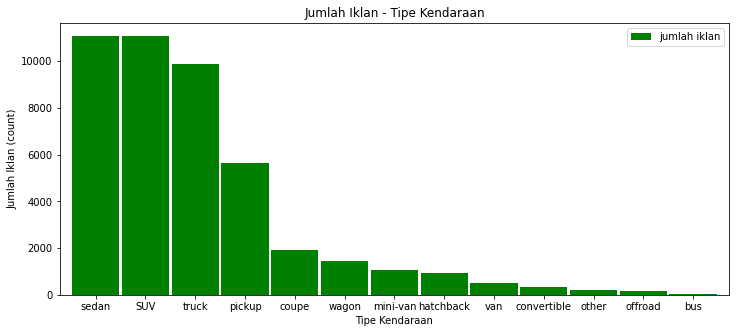

In [51]:
# grafik ketergantungan iklan dengan jenis kendaraan
mean_price_vehicle.sort_values('jumlah iklan', ascending=False).plot(
    kind='bar',
    y='jumlah iklan',
    figsize=(12,5),
    width=0.95,
    rot=0,
    color='green')

# membuat label dan judul
plt.title('Jumlah Iklan - Tipe Kendaraan')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Jumlah Iklan (count)')

# menampilkan grafik
plt.show()

Dari grafik bar chart di atas, terlihat bahwa dua tipe tertinggi dari jumlah tayang iklan adalah tipe `sedan` dengan 11076 iklan dan tipe `SUV` dengan 11058 iklan.

## Faktor Harga

Sampai ditahap terakhir yaitu apakah yang menentukan `Faktor Harga Mobil` berdasarkan data yang kita terima. Kita akan pelajari dari dua tipe kendaraan yang memiliki iklan paling banyak yaitu `tipe sedan` dan `tipe suv`. Kita akan analisis menggunakan `grafik plot korelasi untuk data numerik`, `grafik boxplot untuk data kategori dan matriks korelasi`.



Pertama, kita lakukan filter data dahulu.

In [52]:
# memfilter data untuk mobil sedan
sedan_data = df_final.query('type == "sedan"')
sedan_data = sedan_data[['price','lifetime','avg_mileage','condition','transmission','paint_color']]

# memfilter data untuk mobil suv
suv_data = df_final.query('type == "SUV"')
suv_data = suv_data[['price','lifetime','avg_mileage','condition','transmission','paint_color']]

Selanjutnya kita akan membuat `grafik korelasi untuk data numerik (harga, usia, kondisi, avg_mileage)` dan `grafik boxplot untuk data kategorik (transmisi dan warna)`. Untuk data kategorik yang ditampilkan adalah kategorik yang jumlah iklannya lebih dari 50.


### Mobil Sedan

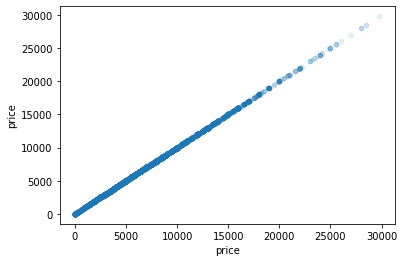

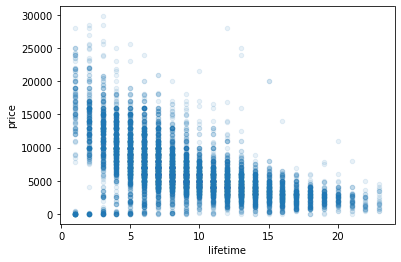

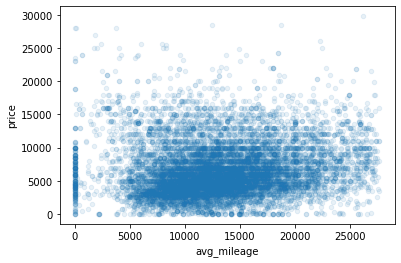

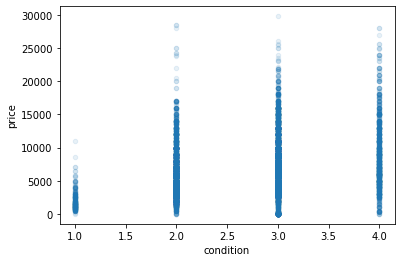

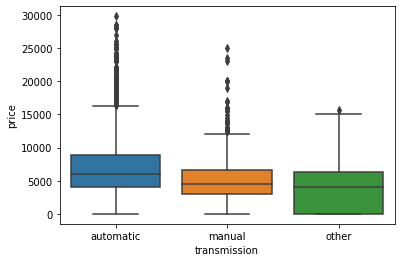

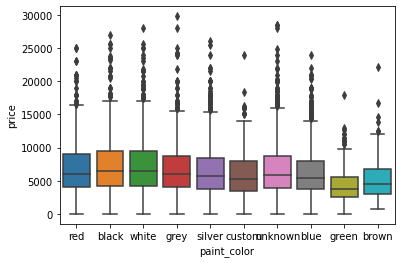

In [53]:
# membuat grafik korelasi untuk mobil sedan
for col in sedan_data.columns:
    # pengkondisian kategori
    if col == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_sedan_transmission = pd.DataFrame()
        for unik_t_sedan in sedan_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('transmission == @unik_t_sedan')['transmission'].count() >= 50:
                # memfilter data kategorik
                sedan_transmission = sedan_data.query('transmission == @unik_t_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_transmission = pd.concat([filter_sedan_transmission,sedan_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_sedan_transmission,x=col,y='price')
        plt.show()
    # pengkondisian kategori
    elif col == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_sedan_color = pd.DataFrame()
        for unik_c_sedan in sedan_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('paint_color == @unik_c_sedan')['paint_color'].count() >= 50:
                # memfilter data kategorik
                sedan_color = sedan_data.query('paint_color == @unik_c_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_color = pd.concat([filter_sedan_color,sedan_color]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_sedan_color,x=col,y='price')
        plt.show()
    else:
        # membuat grafik scatter untuk data numerik
        sedan_data.plot(kind="scatter",x=col,y='price',alpha=0.1)
        plt.show()

Dari grafik plot scatter terlihat bahwa `price` mempunyai korelasi yang baik dengan `lifetime` dan `avg_mielage`, yang artinya semakin rendah usia mobil dan jarak tempuh mobil, maka harga mobil semakin tinggi. Dan untuk `price` dengan `condition` tidak terlalu memiliki korelasi yang baik, walaupun terlihat bahwa jika `condition` semakin bagus juga mempengaruhi harga.

Dari boxplot juga terlihat bahwa untuk transmission `automatic` mempunyai harga yang lebih tinggi dari transmission `manual`, serta untuk warna `black` mempunyai harga yang lebih tinggi dari warna lainnya.

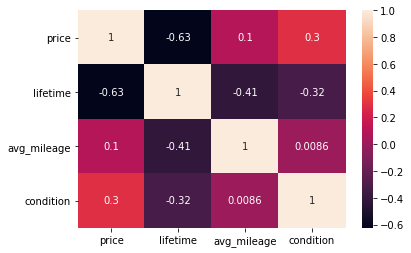

In [54]:
# Membuat tabel kolerasi harga untuk mobil Sedan

corr = sedan_data[['price','lifetime','avg_mileage','condition']].corr()
sns.heatmap(corr,annot=True)
plt.show()

Dari tabel korelasi untuk mobil sedan terbukti bahwa ada korelasi kuat antara `price dengan lifetime` dan `price dengan avg_mileage`. Hal tersebut berarti `semakin tinggi harga jual maka semakin rendah lifetime dan avg_mileage mobil sedan`. Korelasi lemah antara `price dan condition` sehingga tidak memberikan pengaruh yang signifikan terhadap harga jual mobil sedan.



### Mobil SUV

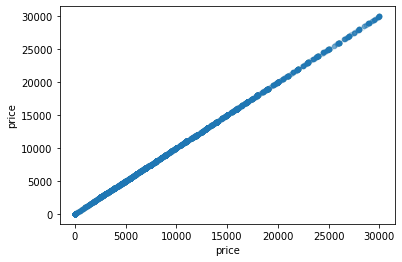

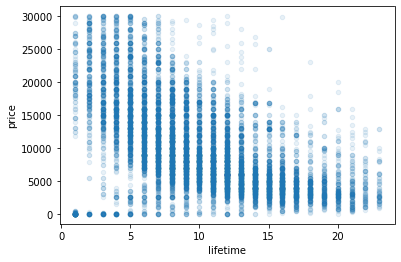

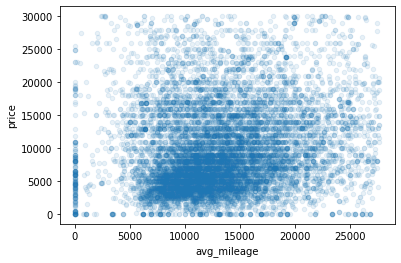

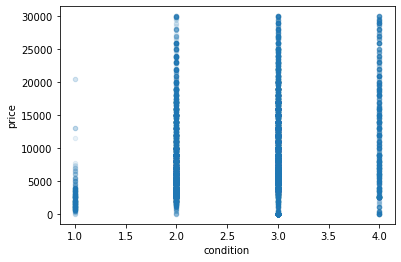

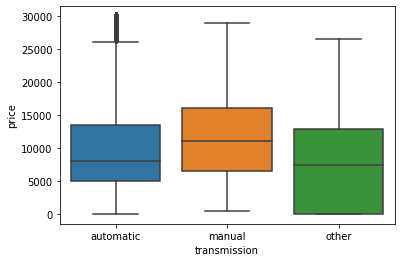

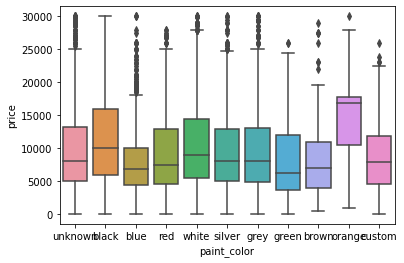

In [55]:
for col in suv_data.columns:
    # pengkondisian kategori
    if col == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_suv_transmission = pd.DataFrame()
        for unik_t_suv in suv_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('transmission == @unik_t_suv')['transmission'].count() >= 50:
                # memfilter data kategorik
                suv_transmission = suv_data.query('transmission == @unik_t_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_transmission = pd.concat([filter_suv_transmission,suv_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_suv_transmission,x=col,y='price')
        plt.show()
    # pengkondisian kategori
    elif col == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_suv_color = pd.DataFrame()
        for unik_c_suv in suv_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('paint_color == @unik_c_suv')['paint_color'].count() >= 50:
                # memfilter data kategorik
                suv_color = suv_data.query('paint_color == @unik_c_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_color = pd.concat([filter_suv_color,suv_color]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_suv_color,x=col,y='price')
        plt.show()
    else:
        # membuat grafik scatter untuk data numerik
        suv_data.plot(kind="scatter",x=col,y='price',alpha=0.1)
        plt.show()

Dari grafik korelasi mobil suv di atas terlihat korelasi yang kuat antara `price dengan lifetime`, namun korelasi yang lemah antara `price dengan avg_mileage` dan `price dengan condition`.

Sedangkan untuk grafik boxplot mobil suv di atas terlihat untuk kategori transmisi, `untuk jenis manual memiliki harga rata-rata yang paling tinggi dibandingkan dengan jenis transmisi lainnya`. Sedangkan untuk kategori warna, untuk jenis `warna orange memiliki harga rata-rata yang paling tinggi` dibandingkan dengan jenis warna lainya.

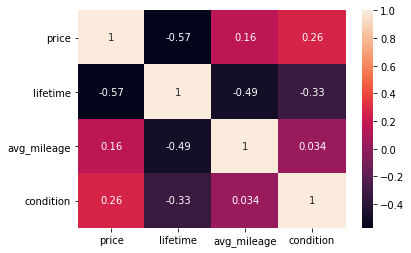

In [56]:
# membuat tabel korelasi harga untuk mobil sedan
corr = suv_data[['price','lifetime','avg_mileage','condition']].corr()
sns.heatmap(corr,annot=True)
plt.show()

Dari tabel korelasi untuk mobil suv terbukti bahwa korelasi yang cukup kuat antara `price dengan lifetime` yang memiliki korelasi negatif. Hal tersebut berarti semakin tinggi harga jual maka semakin rendah usia mobil suv. Korelasi lemah antara `price dengan odometer`, walaupun korelasinya positif, karena penyebaran datanya terlihat merata pada scatter plot, dan untuk `price dengan condition` tidak memberikan pengaruh yang signifikan terhadap harga jual mobil suv.



## Kesimpulan Umum

Analisis faktor yang mempengaruhi harga jual mobil dimulai dengan pengecekan sumber data diantaranya yaitu:
1. Mengecek sampel data
2. Mengecek nilai yang hilang dan mengecek tipe data. 
3. Sumber data memiliki nilai yang hilang diantaranya pada kolom `model_year, cylinders, odometer, paint_color dan is_4wd`. 
Selanjutnya dilakukan perbaikan untuk mengisi nilai yang hilang.

Dan dilanjutkan dengan perbaikan tipe data untuk beberapa kolom di antaranya pada kolom `model_year, cylinders, odometer, is_4wd dan date_posted` menggunakan tipe data yang sesuai. Terakhir dilakukan pengecekan terhadap duplikat data.

Kemudian, membuat beberapa kolom tambahan untuk memudahkan analisis diantaranya kolom untuk memisahkan `date_posted` menjadi `hari, tahun, bulan, tanggal`. Dan beberapa kolom lain yaitu `age dan avg_odo`.

Setelah itu dilanjutkan pengecekan outliers serta Penangananya sebagai berikut:
1. Pemilihan parameter untuk dilakukan analisis menggunakan boxplot. disini kita mengambil beberapa parameter yang mempengaruhi harga `'price'` diantanya yaitu `'lifetime'`,`'avg_mileage'`,`'cylinders'`,`'condition'`.
2. Terdapat beberapa parameter yang mempunyai outliers yaitu `'price'`, `'lifetime','avg_mileage','cylinders'`,`'condition'`.
3. Selanjutnya memfilter data dengan menghilangkan semua outliers yang disebutkan pada langkah 2.
4. Melakukan komparasi data sebelum difilter dan sesudah difilter menggunakan histogram. Terlihat jelas bahwa outliers mempengaruhi distribusi data. Dengan menyingkirkanya data terdistribusi dengan baik.

Setelah memperbaiki data dan menyingkirkan outliers selanjutnya adalah menganalisis serta menyimpulkanya dalam rangkuman berikut:

1. Rata-rata harga price keseluruhan mobil berada pada `USD 5000`.
2. Rata-rata usia keseluruhan mobil yang dijual berada di `usia 13 hingga 14 Tahun`.
3. Rata-rata jarak tempuh kendaraan yang dijual berada di `12000 - 13000 Miles`.
4. Rata-rata pengumuman waktu tayang days_listed iklan mobil berada pada `33 hari`.
5. Waktu tersingkat iklan tayang too_fast berdurasi 0 hari seperti pada `tanggal 2018-08-11`.
6. Waktu terlama iklan tayang too_slow berdurasi 271 hari seperti pada `tanggal 2018-05-24`.
7. Kendaraan dengan jumlah iklan terbanyak adalah `tipe sedan dan suv`.
8. Korelasi data numerik untuk kendaraan `tipe sedan` memiliki hubungan yang kuat antara `price dengan lifetime dan price dengan avg_mileage`. Sedangkan untuk data kategorik untuk `transmisi memiliki harga jual yang tinggi pada jenis automatik`, kategorik untuk warna memiliki `harga jual tinggi pada warna hitam`.
9. Korelasi data numerik untuk kendaraan `tipe suv` memiliki hubungan yang kuat antara `price dengan lifetime dan price dengan avg_mileage`. Sedangkan untuk data kategorik untuk `transmisi memiliki harga jual yang tinggi pada jenis manual`, kategorik untuk `warna memiliki harga jual tinggi pada warna orange`.